In [1]:
#!/usr/bin/env python
#
#  Author: Andreas Brotzer (2024)
# -------------------------------------------------------------------------

In [2]:
import os
import yaml
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from obspy import UTCDateTime
from pandas import read_csv, date_range


In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/ontap-ffb-bay200/'
    lamont_path = '/home/andbro/lamont/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'

## Configurations

In [32]:
config = {}

config['sta'] = "VROMY"

config['tbeg'] = "2024-08-01"
config['tend'] = "2024-09-23"

config['project'] = "rolode"

config['path_to_conf'] = data_path+"VelocityChanges/data/VROMY/sds/"

config['path'] = data_path+f"VelocityChanges/data/VROMY/{config['project']}/"

config['path_to_figs'] = data_path+"VelocityChanges/figures/"

# config['name'] = f"{config['project']}_{str(UTCDateTime(config['tbeg']).date).replace('-','')}"

config['col_names'] = ["frequency", "mean", "std", "mode", "median"]

config['dates'] = date_range(config['tbeg'], config['tend'])
config['dates'] = [str(_d)[:10].replace('-', '') for _d in config['dates']]

cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(config['dates'])))
config['date_colors'] = {_d:_c for _d, _c in zip(config['dates'], colors)}


In [33]:
def __load_dispersion(mode="Love"):

    from pandas import DataFrame, concat, read_csv

    # df = DataFrame()
    data = {}

    dates = date_range(config['tbeg'], config['tend'])

    for _n, _date in enumerate(dates):

        _date_str = str(_date)[:10].replace('-','')

        filename = f"{config['project']}_{_date_str}_{mode}/"

        if os.path.isdir(config['path']+filename):
            try:
                df0 = read_csv(config['path']+f"{filename}"+"results.csv",
                               delimiter=",", header=0, names=config['col_names']
                              )
                data[_date_str] = df0
            except Exception as e:
                print(e)
        else:
            print(f"-> no file for {filename}")

    return data

In [34]:
data_love = __load_dispersion("Love")

-> no file for rolode_20240806_Love/
-> no file for rolode_20240807_Love/
-> no file for rolode_20240808_Love/
-> no file for rolode_20240809_Love/
[Errno 2] No such file or directory: '/import/kilauea-data/VelocityChanges/data/VROMY/rolode/rolode_20240816_Love/results.csv'
[Errno 2] No such file or directory: '/import/kilauea-data/VelocityChanges/data/VROMY/rolode/rolode_20240817_Love/results.csv'
-> no file for rolode_20240818_Love/
-> no file for rolode_20240819_Love/
-> no file for rolode_20240820_Love/
-> no file for rolode_20240821_Love/
-> no file for rolode_20240824_Love/
-> no file for rolode_20240825_Love/
-> no file for rolode_20240826_Love/
-> no file for rolode_20240827_Love/
-> no file for rolode_20240828_Love/
-> no file for rolode_20240829_Love/
-> no file for rolode_20240830_Love/


In [35]:
data_rayl = __load_dispersion("Rayleigh2")

-> no file for rolode_20240806_Rayleigh2/
-> no file for rolode_20240807_Rayleigh2/
-> no file for rolode_20240808_Rayleigh2/
-> no file for rolode_20240809_Rayleigh2/
-> no file for rolode_20240816_Rayleigh2/
-> no file for rolode_20240817_Rayleigh2/
-> no file for rolode_20240818_Rayleigh2/
-> no file for rolode_20240819_Rayleigh2/
-> no file for rolode_20240820_Rayleigh2/
-> no file for rolode_20240821_Rayleigh2/
-> no file for rolode_20240824_Rayleigh2/
-> no file for rolode_20240825_Rayleigh2/
-> no file for rolode_20240826_Rayleigh2/
-> no file for rolode_20240827_Rayleigh2/
-> no file for rolode_20240828_Rayleigh2/
-> no file for rolode_20240829_Rayleigh2/
-> no file for rolode_20240830_Rayleigh2/


### Plotting

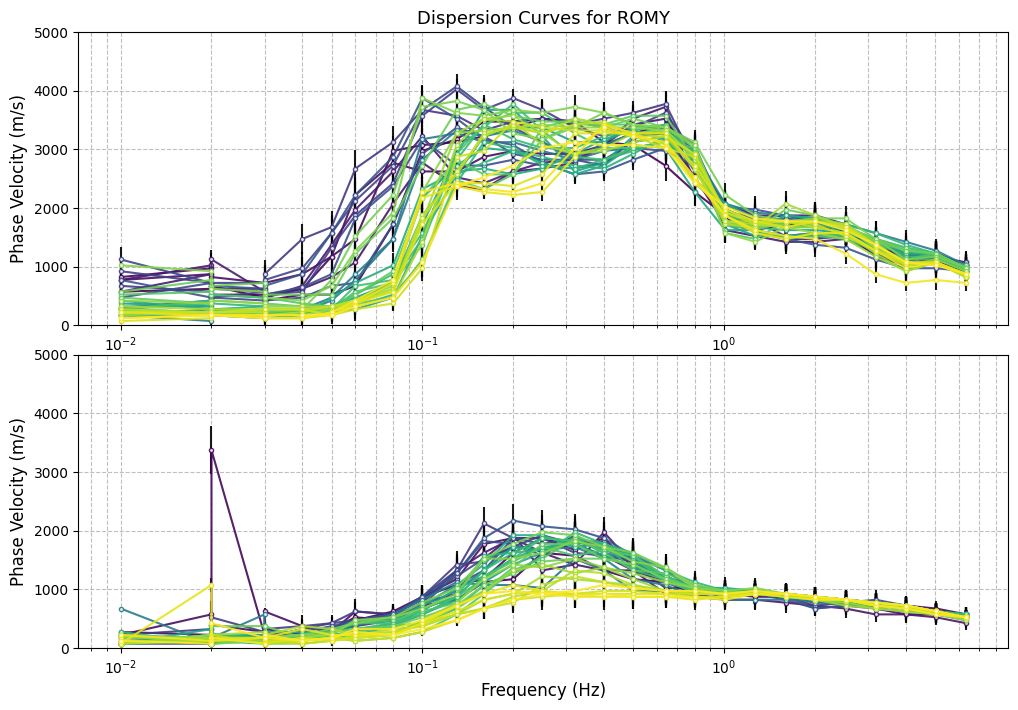

In [36]:
def __makeplot():

    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib as mpl

    Nrow, Ncol = 2, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(12, 8), sharex=False)

    plt.subplots_adjust(hspace=0.1)

    for _i, k in enumerate(data_love.keys()):

        _data = data_love[k]
        _data.dropna(inplace=True)

        try:
            ax[0].errorbar(_data['frequency'].astype(float),
                           _data['median'].astype(float),
                           yerr=_data['std'].astype(float),
                           ls="-", ms=3, marker="o", label=k,
                           ecolor="k", markerfacecolor="w",
                           color=config['date_colors'][k], alpha=0.9
                           )
        except:
            pass

    for _i, k in enumerate(data_rayl.keys()):

        _data = data_rayl[k]
        _data.dropna(inplace=True)

        try:
            ax[1].errorbar(_data['frequency'].astype(float),
                           np.array(_data['median'].astype(float)),
                           yerr=_data['std'].astype(float),
                           ls="-", ms=3, marker="o", label=k,
                           ecolor="k", markerfacecolor="w",
                           color=config['date_colors'][k], alpha=0.9
                           )
        except Exception as e:
            print(e)
            pass

    for n in range(2):
        ax[n].set_xscale("log")

        ax[n].set_ylim(0, 5000)

        ax[n].grid(which="both", ls="--", color="grey", alpha=0.5, zorder=0)

        # ax[n].legend(loc=1)

    ax[0].set_ylabel("Phase Velocity (m/s)", fontsize=font)
    ax[1].set_ylabel("Phase Velocity (m/s)", fontsize=font)
    ax[1].set_xlabel("Frequency (Hz)", fontsize=font)
    ax[0].set_title("Dispersion Curves for ROMY", fontsize=font+1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"Dispersion_{config['tbeg']}_{config['tend']}.png", format="png", dpi=150, bbox_inches='tight')


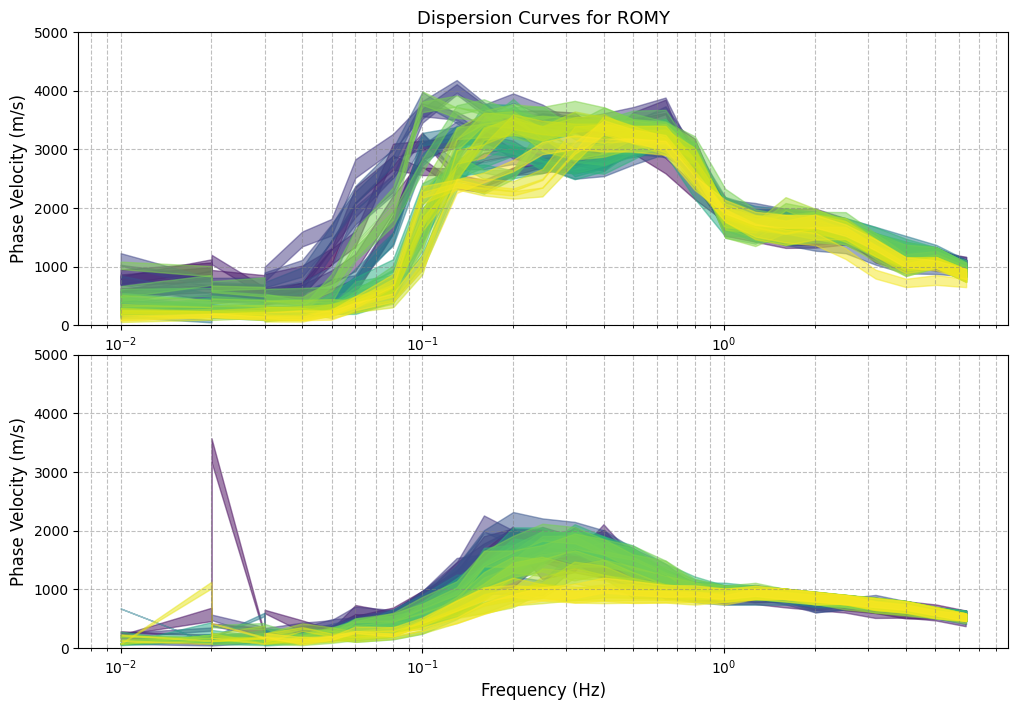

In [39]:
def __makeplot():

    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib as mpl

    Nrow, Ncol = 2, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(12, 8), sharex=False)

    plt.subplots_adjust(hspace=0.1)

    for _i, k in enumerate(data_love.keys()):

        _data = data_love[k]
        _data.dropna(inplace=True)

        try:
            ax[0].fill_between(_data['frequency'].astype(float),
                           np.array(_data['median'].astype(float))-_data['std'].astype(float)/2,
                           np.array(_data['median'].astype(float))+_data['std'].astype(float)/2,
                           color=config['date_colors'][k], alpha=0.5
                           )
        except:
            pass

    for _i, k in enumerate(data_rayl.keys()):

        _data = data_rayl[k]
        _data.dropna(inplace=True)

        try:
            ax[1].fill_between(_data['frequency'].astype(float),
                           np.array(_data['median'].astype(float))-_data['std'].astype(float)/2,
                           np.array(_data['median'].astype(float))+_data['std'].astype(float)/2,
                           color=config['date_colors'][k], alpha=0.5
                           )

        except Exception as e:
            print(e)
            pass

    for n in range(2):

        ax[n].set_xscale("log")

        ax[n].set_ylim(0, 5000)

        ax[n].grid(which="both", ls="--", color="grey", alpha=0.5, zorder=0)

        # ax[n].legend(loc=1)

    ax[0].set_ylabel("Phase Velocity (m/s)", fontsize=font)
    ax[1].set_ylabel("Phase Velocity (m/s)", fontsize=font)
    ax[1].set_xlabel("Frequency (Hz)", fontsize=font)
    ax[0].set_title("Dispersion Curves for ROMY", fontsize=font+1)

    plt.show();
    return fig

fig = __makeplot();

# fig.savefig(config['path_to_figs']+f"Dispersion_{config['tbeg']}_{config['tend']}.png", format="png", dpi=150, bbox_inches='tight')


## Plot Over Time

In [15]:
def __get_mesh(_data):

    X = np.array([k for k in _data.keys()])
    Y = _data[X[0]]['frequency']

    # get dates
    dates = date_range(config['tbeg'], config['tend'])

    # modify dates
    dates = np.array([str(_d)[:10].replace('-', '') for _d in dates])

    # define sizes
    NY, NX = len(_data[X[0]]['frequency']), len(dates)

    Z = []
    for _d in dates[:-1]:
        if _d in _data.keys():
            _tmp = [float(x) for x in _data[_d]['median'].values]
            Z.append(np.array(_tmp))
        else:
            Z.append(np.ones(NY)*np.nan)

    Y = np.append(Y, 0.00001)

    X = np.arange(0, len(dates), 1)

    mesh = {}
    mesh['X'] = np.array(X)
    mesh['Y'] = np.array(Y)
    mesh['Z'] = np.array(Z).T
    mesh['dates'] = dates

    return mesh

In [16]:
mesh_l = __get_mesh(data_love)
mesh_r = __get_mesh(data_rayl)

(0.01, 5.05)

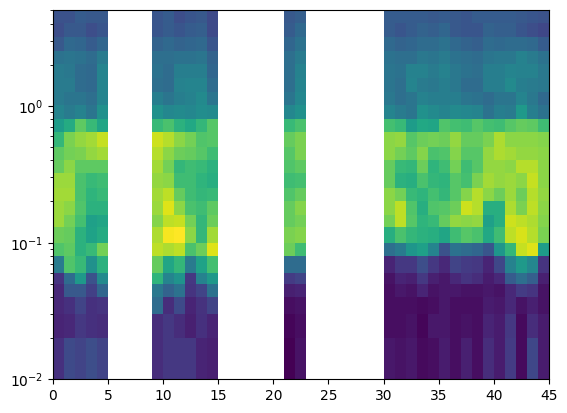

In [17]:
plt.pcolormesh(mesh_l['X'], mesh_l['Y'], mesh_l['Z'])
plt.yscale("log")
plt.ylim(mesh_l['Y'][-2], mesh_l['Y'][1])

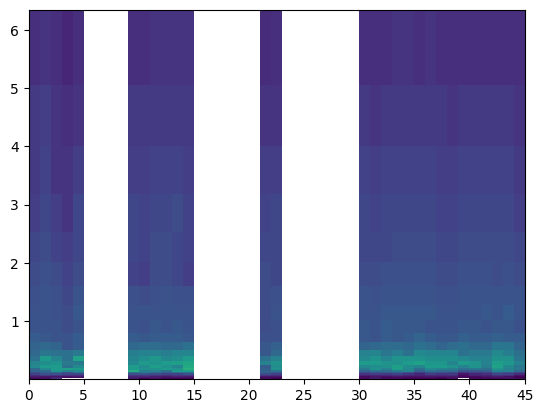

In [18]:
plt.pcolormesh(mesh_r['X'], mesh_r['Y'], mesh_r['Z'])

/tmp/ipykernel_2404657/270245538.py:40: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[n].legend(loc=1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_2404657/270245538.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(tcklbls)
/tmp/ipykernel_2404657/270245538.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(tcklbls)


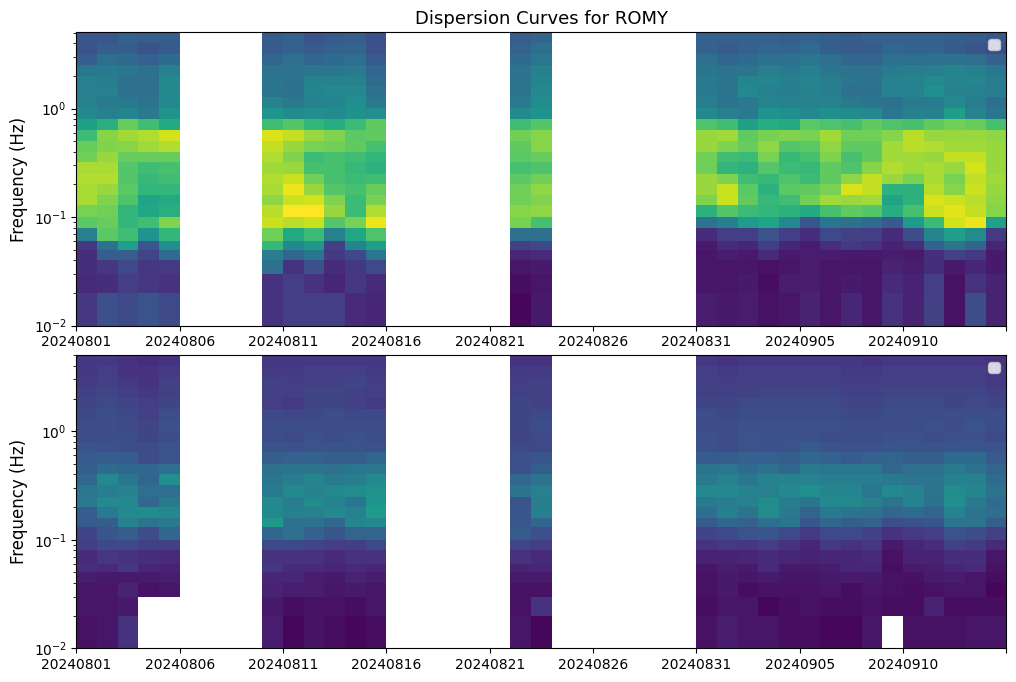

In [19]:
def __makeplot():

    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib as mpl

    Nrow, Ncol = 2, 1

    cmap = plt.get_cmap("viridis")

    vmin, vmax = 0, 4000

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(12, 8), sharex=False)

    plt.subplots_adjust(hspace=0.1)
    try:
        ax[0].pcolormesh(mesh_l['X'], mesh_l['Y'], mesh_l['Z'],
                         vmin=vmin, vmax=vmax, label="Love"
                        )
        ax[0].set_yscale("log")
        ax[0].set_ylim(mesh_l['Y'][-2], mesh_l['Y'][1])
    except:
        pass

    try:
        ax[1].pcolormesh(mesh_r['X'], mesh_r['Y'], mesh_r['Z'],
                         vmin=vmin, vmax=vmax, label="Rayleigh"
                        )
        ax[1].set_yscale("log")
        ax[1].set_ylim(mesh_r['Y'][-2], mesh_r['Y'][1])
    except:
        pass

    for n in range(2):

        # ax[n].grid(which="both", ls="--", color="grey", alpha=0.5, zorder=0)

        ax[n].legend(loc=1)

    # ax[0].set_ylabel("Phase Velocity (m/s)", fontsize=font)
    # ax[1].set_ylabel("Phase Velocity (m/s)", fontsize=font)
    ax[0].set_ylabel("Frequency (Hz)", fontsize=font)
    ax[1].set_ylabel("Frequency (Hz)", fontsize=font)
    # ax[1].set_xlabel("Time (days)", fontsize=font)

    ax[0].set_title("Dispersion Curves for ROMY", fontsize=font+1)

    tcks = ax[1].get_xticks()
    tcklbls = [mesh_r['dates'][int(_t)] for _t in tcks[:-1]]
    ax[0].set_xticklabels(tcklbls)
    ax[1].set_xticklabels(tcklbls)

    plt.show();
    return fig

fig = __makeplot();

# fig.savefig(config['path_to_figs']+f"Dispersion_{config['tbeg']}_{config['tend']}.png", format="png", dpi=150, bbox_inches='tight')
